# Bloch Sphere Animation


Animation with QuTiP and Matplotlib

Here we'll try to visualize a decaying qubit

The Bloch sphere is a 3D representation of a qubit (quantum bit) and provides a visual representation of the state of a qubit. QuTiP, the Quantum Toolbox in Python, offers a convenient way to visualize the Bloch sphere. 

------

To visualize the Bloch sphere in QuTiP, you can use the `Bloch` class. This class provides functions for plotting points and vectors on the sphere, making it easy to see the state of a qubit and understand how quantum operations affect the state of a qubit.

-----

The north pole of the Bloch sphere represents the state |0⟩ and the south pole represents the state |1⟩. By plotting the state of a qubit as a point on the sphere, you can gain a deeper understanding of the behavior of quantum systems. 


In [1]:
%pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 82.9 MB/s eta 0:00:00


A decaying qubit refers to a quantum system in which the state of the qubit decays over time due to external influences or internal processes. Visualizing the decay of a qubit can help to understand how quantum systems evolve over time and how external factors can impact the behavior of quantum systems.

-------

One way to visualize the decay of a qubit is to use the Bloch sphere. In QuTiP, the Bloch sphere can be used to plot the state of the qubit at different points in time. The state of the qubit can be represented as a point on the sphere, and the movement of this point over time can be used to show the decay of the qubit. For example, if the qubit starts in the state |0⟩, this can be represented as a point at the north pole of the sphere. As the qubit decays, the state of the qubit will move away from the north pole towards the equator, representing the increased uncertainty in the state of the qubit.

------

It is also possible to visualize the decay of a qubit by plotting the probability of finding the qubit in the state |0⟩ or |1⟩ over time. This can help to understand how the decay of the qubit affects the probability of finding the qubit in a particular state.

**Sample Code:**


```python

import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# Define the initial state of the qubit
psi0 = basis(2, 0)

# Define the decay rate
gamma = 0.1

# Define the time steps for the simulation
times = np.linspace(0, 5, 100)

# Define the Lindblad superoperator for the decay process
c_ops = [np.sqrt(gamma) * sigmam()]

# Use QuTiP's mesolve function to evolve the state of the qubit over time
result = mesolve(H=0, psi0=psi0, tlist=times, c_ops=c_ops, e_ops=[sigmaz()])

# Create a Bloch sphere object
bloch = Bloch()

# Plot the state of the qubit at each time step on the Bloch sphere
for i in range(len(times)):
    bloch.add_states(result.states[i], kind='point')

# Show the Bloch sphere
bloch.show()
```

-----

This code uses the mesolve function from QuTiP to simulate the evolution of the qubit over time due to decay. The decay rate is defined as gamma, and the Lindblad superoperator is defined using the sigmam operator, which represents the lowering operator for the qubit. The state of the qubit is evolved over time using mesolve and the resulting states are plotted on the Bloch sphere using the Bloch class from QuTiP. This code will produce a plot of the Bloch sphere with points representing the state of the qubit at each time step, showing the decay of the qubit over time.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from qutip import Bloch, about, basis, mesolve, sigmam, sigmax, sigmay, sigmaz
from qutip.ipynbtools import plot_animation

%matplotlib inline

In [3]:
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    sm = sigmam()
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5  # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sz)

    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])
    return output

In [4]:
w = 1.0 * 2 * np.pi  # qubit angular frequency
theta = 0.2 * np.pi  # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5  # qubit relaxation rate
gamma2 = 0.2  # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a * basis(2, 0) + (1 - a) * basis(2, 1)) / \
        (np.sqrt(a**2 + (1 - a) ** 2))
tlist = np.linspace(0, 4, 150)

In [5]:
result = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

In [6]:
def plot_setup(result):

    fig = plt.figure(figsize=(8, 8))
    axes = Axes3D(fig, azim=-40, elev=30)

    return fig, axes

In [7]:
sphere = None


def plot_result(result, n, fig=None, axes=None):

    global sphere

    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ["r"]

    sphere.clear()
    sphere.add_vectors([result.expect[0][n],
                        result.expect[1][n],
                        result.expect[2][n]])
    sphere.add_points(
        [
            result.expect[0][: n + 1],
            result.expect[1][: n + 1],
            result.expect[2][: n + 1],
        ],
        meth="l",
    )
    sphere.make_sphere()

    return axes.artists

In [8]:
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
plot_animation(plot_setup, plot_result, result, writer="ffmpeg", codec=None)

<Figure size 360x360 with 0 Axes>

# Bloch Sphere with a Colorbar

In [10]:
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz

%matplotlib inline

## Do a closed Landau-Zener Evolution

The Landau-Zener (LZ) model is a two-level quantum system that is used to describe the non-adiabatic transition between two energy levels in a time-dependent system. The closed Landau-Zener (LZ) evolution refers to the scenario where the system returns to its initial state after undergoing the LZ transition. This can happen when the system is closed, meaning it is not coupled to an external environment, and energy conservation is satisfied.


-------

In a closed LZ evolution, the initial state of the system undergoes a transition to the excited state, followed by a transition back to the ground state. The transitions occur at a rate that is determined by the time-dependent magnetic field and the energy gap between the two levels.


------

The closed LZ evolution is important because it provides a simple model for understanding the behavior of quantum systems in time-dependent systems. It is used to study the quantum dynamics of systems in a wide range of fields, including quantum computing, quantum optics, and condensed matter physics.


-----

In conclusion, the closed Landau-Zener evolution is a useful model for understanding the behavior of two-level quantum systems in time-dependent systems. It provides insights into the non-adiabatic transitions between energy levels and the energy conservation in closed systems.

In [11]:
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate

H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 1500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect

## Generate a Bloch Sphere with Multi-Colored Points
Note that I need to call `b.show` here so that I can grab a Figure instance later

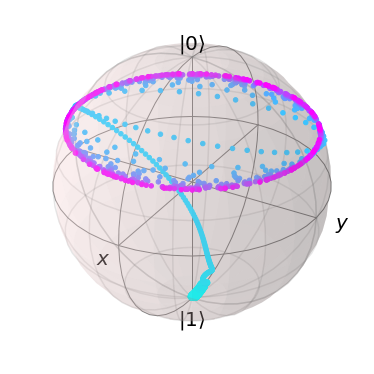

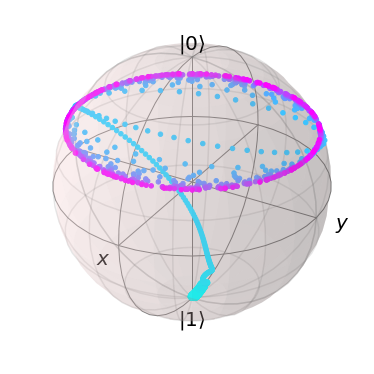

In [12]:
b = Bloch()
# normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(-2, 10)
colors = cm.cool(nrm(tlist))

# add data points from expectation values ##
b.add_points([expt_list[1], expt_list[2], -expt_list[3]], "m")

# customize sphere properties ##
b.point_color = list(colors)
b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()

## Add new axis to Bloch Figure

In [13]:
left, bottom, width, height = [0.98, 0.05, 0.05, 0.9]
ax2 = b.fig.add_axes([left, bottom, width, height])

mpl.colorbar.ColorbarBase(ax2, cmap=cm.cool, norm=nrm, orientation="vertical");

## Plot with Colorbar Added
Currently I need to call `b.fig` as replotting figures in a notebook is a bit tricky. However, this is likely to be improved in the future

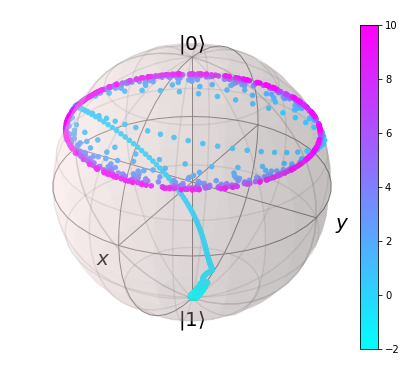

In [14]:
b.fig

## Software Versions

In [15]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1
Numpy Version:      1.21.6
Scipy Version:      1.7.3
Cython Version:     0.29.33
Matplotlib Version: 3.2.2
Python Version:     3.8.10
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /usr/local/lib/python3.8/dist-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qut